<img src="Amsterdam_Magere_Brug.jpg" width=900 height=500 />

<h2>Introduction/Business Problem</h2>

Amsterdam
From Wikipedia, the free encyclopedia

Amsterdam is the capital and largest city in the European country of the Netherlands. Amsterdam is famous for its canals and dikes. Unlike most other countries, the national government is not in Amsterdam, but in The Hague.

About 838,000 people were living in Amsterdam in 2016. The city hosts two universities (the University of Amsterdam and the Free University Amsterdam) and an international airport "Schiphol Airport". About 2.2 million people live in the metropolitan area. The city of Amsterdam is the world's most multi-cultural city. It has people living there from 175 different countries.

The idea is to start a Russian restaurant in Amsterdam, the Netherlands.
This idea came to me to me because we have a lot of nationalities living in Amsterdam and there are a lot of restaurants and I want to find out if there are any Russian restaurantsand if there would be a market for one.


Then we need to find a spot in Amsterdam where the restaurant will be located, and find out the property prices in that area.

Please check out my online presentation for a better explanation of the process: https://docs.google.com/presentation/d/e/2PACX-1vTs_L0J64QNS8HI57wPOhE_kBQiC6egEMDDwQ_s9-ULlXKa_VJEARjHzJbig8XcRiY7b39wJOedYQj6/pub?start=true&loop=true&delayms=5000

<img src="https://s3.amazonaws.com/btoimage/prism-thumbnails/articles/cff8-201279-russian-restaurants-toronto.jpg-resize_then_crop-_frame_bg_color_FFF-h_1365-gravity_center-q_70-preserve_ratio_true-w_2048_.webp" width=900 height=500/>

## Data section

I will use the following resources to achieve the goal:
- <h3>Urllib</h3><i>A library for opening URLs that can be extended by defining custom protocol handlers.</i>
- <h3>BeautifulSoup</h3><i>Beautiful Soup is a Python package for parsing HTML and XML documents (including having malformed markup, i.e. non-closed tags, so named after tag soup). It creates a parse tree for parsed pages that can be used to extract data from HTML[2], which is useful for web scraping..</i>
- <h3>GeoPy</h3><i>Geopy makes it easy for Python developers to locate the coordinates of addresses, cities, countries, and landmarks across the globe using third-party geocoders and other data sources.</i>
- <h3>Folium</h3><i>Folium makes it easy to visualize data that’s been manipulated in Python on an interactive leaflet map</i>
- <h3>SKlearn</h3><i>Scikit-learn is a free software machine learning library for the Python programming language.It features various classification, regression and clustering algorithms.</i>
- <h3>Foursquare API</h3><i>We use this api to get the most popular locations in our neighborhoods.</i>
- <h3>Wikipedia</h3><i>to get and scrape the data from</i>
    

In [194]:
import urllib.request ### import module to open the wikipedia url
from bs4 import BeautifulSoup ### import module to make the url more readable
import pandas as pd

import numpy as np ### library to handle data in a vectorized manner

import pandas as pd ### library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json ### library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests ### library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

### Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
%matplotlib inline

### import the seaborn plotting library
import seaborn as sns

### import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import folium ### map rendering library

print('Libraries imported.')

Libraries imported.


In [195]:
CLIENT_ID = 'QQAYS1A3THK0SQXOIY0LAMIWQFNH0CHIBZU5Y1LCFL4ZX3OE' # your Foursquare ID
CLIENT_SECRET = 'YXH1VERSJN2YVK2T22HBTQHXRQJGDWKNV3HRKSXGSRIRLQGO' # your Foursquare Secret
VERSION = '20200605' # Foursquare API version

We will get the Amsterdam neighborhoods and buroughs from the following Wikipedia page:

In [196]:
url = requests.get("https://en.wikipedia.org/wiki/Boroughs_of_Amsterdam").text

Then we use beautifulsoup to scrape the retrieved webpage:

In [197]:
soup = BeautifulSoup(url,"html.parser")

In [198]:
amsterdam_table = soup.find("table" ,class_='wikitable sortable')

In [199]:
### Create six empy lists to fill with the data from the amsterdam_table:
Borough_list=[]
Area_list = []
Population_list = []
Population_density_list = []
Location_list = []
Neighborhood_list=[]

### Loop trough the amsterdam_table and fill the six lists with data:
for row in amsterdam_table.findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==6:
        Borough_list.append(cells[0].find(text=True))
        Neighborhood_list.append(cells[5].find(text=True))


In [200]:
### Create the pandas dataframe from the three lists:
df = pd.DataFrame(Borough_list,columns=['Borough'])
#df['Borough']=Borough_list
df['Neighborhood'] = Neighborhood_list
df

,Borough,Neighborhood
0,Centrum,"Binnenstad, Grachtengordel, Haarlemmerbuurt, J..."
1,Noord,"Banne Buiksloot, Buiksloot, Buikslotermeer, Fl..."
2,Nieuw-West,"Geuzenveld, Nieuw Sloten, Oostoever, Osdorp, O..."
3,Oost,"IJburg, Indische Buurt, Eastern Docklands, Oud..."
4,West,"Frederik Hendrikbuurt, Houthaven, Spaarndammer..."
5,Westpoort,Westpoort\n
6,Zuid,"Apollobuurt, Buitenveldert, Hoofddorppleinbuur..."
7,Zuidoost,"Bijlmermeer, Venserpolder, Gaasperdam, Driemond\n"


In [201]:
### Clean the \n from the dataframe:
df=df.replace({'\n': ''}, regex=True) 
df

,Borough,Neighborhood
0,Centrum,"Binnenstad, Grachtengordel, Haarlemmerbuurt, J..."
1,Noord,"Banne Buiksloot, Buiksloot, Buikslotermeer, Fl..."
2,Nieuw-West,"Geuzenveld, Nieuw Sloten, Oostoever, Osdorp, O..."
3,Oost,"IJburg, Indische Buurt, Eastern Docklands, Oud..."
4,West,"Frederik Hendrikbuurt, Houthaven, Spaarndammer..."
5,Westpoort,Westpoort
6,Zuid,"Apollobuurt, Buitenveldert, Hoofddorppleinbuur..."
7,Zuidoost,"Bijlmermeer, Venserpolder, Gaasperdam, Driemond"


In [202]:
neigh_list = []
for i in Neighborhood_list:
    i = i.split(',')
    for j in i:
        neigh_list.append(j)
len(neigh_list)

69

In [203]:
df_neigh = pd.DataFrame(neigh_list, columns=['Neighbourhood'])
df_neigh.head()

,Neighbourhood
0,Binnenstad
1,Grachtengordel
2,Haarlemmerbuurt
3,Jodenbuurt
4,Jordaan


In [204]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="ams_explorer",timeout=5)

In [205]:
column_names = ['Neighbourhood', 'Latitude', 'Longitude'] 

# instantiate the data frame
nhoods = pd.DataFrame(columns=column_names)

for i in range(0,len(df_neigh)):
    
    address = df_neigh['Neighbourhood'][i]+', Amsterdam'
    location = geolocator.geocode(address)
    if location == None:
        latitude = 0
        longitude = 0
    else:
        latitude = location.latitude
        longitude = location.longitude
        
    nhoods = nhoods.append({'Neighbourhood': df_neigh['Neighbourhood'][i],
                                              'Latitude': latitude,
                                              'Longitude': longitude}, ignore_index=True)
        

In [206]:
nhoods['Latitude']=nhoods['Latitude'].astype(float)
nhoods['Longitude']=nhoods['Longitude'].astype(float)

### A few of the results where not in Amsterdam so I will restrict the lattitude and longitude we look in:
nhoods=nhoods[(nhoods.Latitude>52) & (nhoods.Latitude<53) & (nhoods.Longitude<5)] 
nhoods.reset_index(inplace=True,drop=True)

In [207]:
nhoods= nhoods.sort_values(by=['Neighbourhood'])

nhoods.head()

,Neighbourhood,Latitude,Longitude
43,Bos en Lommer,52.378521,4.848738
12,Buiksloot,52.392562,4.929279
13,Buikslotermeer,52.399439,4.943135
49,Buitenveldert,52.328647,4.873523
42,De Baarsjes,52.368926,4.856382


In [208]:
# create map of Amsterdam using latitude and longitude values
map_amsterdam = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(nhoods['Latitude'], nhoods['Longitude'], nhoods['Neighbourhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.5,
        parse_html=False).add_to(map_amsterdam)  
legend_html =   '''
                <div style="position: fixed; 
                            top: 100px; right: 30px; width: 140px; height: 50px; 
                            border:2px solid blue; z-index:9999; font-size:15px;
                            ">&nbsp; Yellow - Neighborhoods in Amsterdam <br>
                            
                              
                </div>
                ''' 
    
map_amsterdam

In [209]:
neighborhood_latitude = nhoods.loc[1, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = nhoods.loc[1, 'Longitude'] # neighborhood longitude value

neighborhood_name = nhoods.loc[0, 'Neighbourhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of  Grachtengordel are 52.382441299999996, 4.887193084850383.


In [210]:
LIMIT = 100
radius = 500

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=QQAYS1A3THK0SQXOIY0LAMIWQFNH0CHIBZU5Y1LCFL4ZX3OE&client_secret=YXH1VERSJN2YVK2T22HBTQHXRQJGDWKNV3HRKSXGSRIRLQGO&v=20200605&ll=52.382441299999996,4.887193084850383&radius=500&limit=100'

In [211]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5eec787f618f43001bb13c03'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Haarlemmerbuurt',
  'headerFullLocation': 'Haarlemmerbuurt, Amsterdam',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 69,
  'suggestedBounds': {'ne': {'lat': 52.3869413045, 'lng': 4.89455168779231},
   'sw': {'lat': 52.377941295499994, 'lng': 4.879834481908455}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4a2703ebf964a520b7851fe3',
       'name': 'Small World Catering',
       'location': {'address': 'Binnen Oranjestraat 14',
        'lat': 52.38218904227042,
        'lng': 4.887082361755015,
        'labeledLatLngs': [{'label': 'display',
       

In [212]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [213]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head

<bound method NDFrame.head of                                name                     categories        lat  \
0              Small World Catering                 Sandwich Place  52.382189   
1                              TOKI                    Coffee Shop  52.382969   
2                    Brouwersgracht                          Canal  52.380767   
3                            Le Sud  Vegetarian / Vegan Restaurant  52.383254   
4                 Good Beans Coffee                    Coffee Shop  52.382397   
5                        Vesper Bar                            Bar  52.382221   
6                             Marqt                Organic Grocery  52.381223   
7                      De Oranjerie                            Pub  52.382013   
8                        The Movies            Indie Movie Theater  52.384039   
9             Bikram Yoga Amsterdam                    Yoga Studio  52.381130   
10                        Sweet Bob                   Dessert Shop  52.380975  

In [214]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

69 venues were returned by Foursquare.


In [215]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [216]:
ams_venues = getNearbyVenues(names=nhoods['Neighbourhood'],
                                   latitudes=nhoods['Latitude'],
                                   longitudes=nhoods['Longitude']
                                  )

 Bos en Lommer
 Buiksloot
 Buikslotermeer
 Buitenveldert
 De Baarsjes
 De Pijp
 Eastern Docklands
 Floradorp
 Gaasperdam
 Grachtengordel
 Haarlemmerbuurt
 Houthaven
 Indische Buurt
 Jordaan
 Kadijken
 Kadoelen
 Kinkerbuurt
 Kolenkitbuurt
 Landlust
 Lastage
 Molenwijk
 Museumkwartier
 Nieuw Sloten
 Nieuwendam
 Oostelijke Eilanden
 Oosterdokseiland
 Oostoever
 Oostzanerwerf
 Osdorp
 Oud-Oost
 Overhoeks
 Overtoomse Veld
 Plantage
 Rapenburg
 Rivierenbuurt
 Schinkelbuurt
 Sloten
 Sloterdijk

 Slotermeer
 Slotervaart

 Spaarndammerbuurt
 Staatsliedenbuurt
 Stadionbuurt
 Tuindorp Nieuwendam
 Tuindorp Oostzaan

 Uilenburg
 Venserpolder
 Vondelpark
 Watergraafsmeer

 Westerpark
 Weteringschans

 Willemspark
 Zeeheldenbuurt
 Zuidas

Apollobuurt
Banne Buiksloot
Bijlmermeer
Frederik Hendrikbuurt
Geuzenveld
IJburg
Westpoort



In [217]:
print(ams_venues.shape)
ams_venues.head()

(2214, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bos en Lommer,52.378521,4.848738,BBROOD,52.378420,4.848659,Bakery
1,Bos en Lommer,52.378521,4.848738,De Nieuwe Boekhandel,52.378839,4.851355,Bookstore
2,Bos en Lommer,52.378521,4.848738,Birtat,52.378587,4.848157,Mediterranean Restaurant
3,Bos en Lommer,52.378521,4.848738,Seyidoglu Istanbul Baklava & Patisserie,52.378599,4.849694,Dessert Shop
4,Bos en Lommer,52.378521,4.848738,Primera,52.378644,4.849819,Paper / Office Supplies Store


In [218]:
ams_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Bos en Lommer,51,51,51,51,51,51
Buiksloot,10,10,10,10,10,10
Buikslotermeer,26,26,26,26,26,26
Buitenveldert,49,49,49,49,49,49
De Baarsjes,57,57,57,57,57,57
De Pijp,100,100,100,100,100,100
Eastern Docklands,26,26,26,26,26,26
Floradorp,19,19,19,19,19,19
Gaasperdam,5,5,5,5,5,5


In [219]:
print('There are {} uniques categories.'.format(len(ams_venues['Venue Category'].unique())))

There are 283 uniques categories.


In [220]:
# one hot encoding
ams_onehot = pd.get_dummies(ams_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
ams_onehot['Neighborhood'] = ams_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [ams_onehot.columns[-1]] + list(ams_onehot.columns[:-1])
ams_onehot = ams_onehot[fixed_columns]

ams_onehot.head()

,Zoo Exhibit,Accessories Store,Afghan Restaurant,African Restaurant,American Restaurant,Aquarium,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Australian Restaurant,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bar,Baseball Field,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Bike Rental / Bike Share,Bistro,Board Shop,Boarding House,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brasserie,Breakfast Spot,Brewery,Bridal Shop,Bridge,Buffet,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Café,Campground,Canal,Cantonese Restaurant,Caribbean Restaurant,Casino,Cheese Shop,Child Care Service,Chinese Restaurant,Chocolate Shop,Church,Cigkofte Place,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dive Bar,Dog Run,Doner Restaurant,Drugstore,Dutch Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Fondue Restaurant,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Friterie,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,Gay Bar,General Entertainment,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Hockey Field,Hostel,Hot Dog Joint,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Korean Restaurant,Latin American Restaurant,Laundry Service,Lawyer,Lebanese Restaurant,Lingerie Store,Liquor Store,Lounge,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music School,Music Store,Music Venue,Neighborhood,Newsstand,Nightclub,North Indian Restaurant,Notary,Office,Opera House,Optical Shop,Organic Grocery,Outdoor Supply Store,Outdoors & Recreation,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Store,Pharmacy,Pier,Pilates Studio,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool,Pool Hall,Pop-Up Shop,Portuguese Restaurant,Pub,Public Art,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Rest Area,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Ski Area,Smoke Shop,Snack Place,Soccer Field,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Spiritual Center,Sporting Goods Shop,Sports Club,Stables,Stadium,Steakhouse,Storage Facility,Supermarket,Sushi Restaurant,Taco Place,Tailor Shop,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Theme Restaurant,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Track,Train Station,Tram Station,Turkish Restaurant,Udon Restaurant,Vacation Rental,Vegetarian / Vegan Restaurant,Veterinarian,Vietnamese Restaurant,Whisky B

In [221]:
ams_onehot.shape

(2214, 283)

In [222]:
ams_grouped = ams_onehot.groupby('Neighborhood').mean().reset_index()
ams_grouped.head()

,Neighborhood,Zoo Exhibit,Accessories Store,Afghan Restaurant,African Restaurant,American Restaurant,Aquarium,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Australian Restaurant,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bar,Baseball Field,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Bike Rental / Bike Share,Bistro,Board Shop,Boarding House,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brasserie,Breakfast Spot,Brewery,Bridal Shop,Bridge,Buffet,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Café,Campground,Canal,Cantonese Restaurant,Caribbean Restaurant,Casino,Cheese Shop,Child Care Service,Chinese Restaurant,Chocolate Shop,Church,Cigkofte Place,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dive Bar,Dog Run,Doner Restaurant,Drugstore,Dutch Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Fondue Restaurant,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Friterie,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,Gay Bar,General Entertainment,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Hockey Field,Hostel,Hot Dog Joint,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Korean Restaurant,Latin American Restaurant,Laundry Service,Lawyer,Lebanese Restaurant,Lingerie Store,Liquor Store,Lounge,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music School,Music Store,Music Venue,Newsstand,Nightclub,North Indian Restaurant,Notary,Office,Opera House,Optical Shop,Organic Grocery,Outdoor Supply Store,Outdoors & Recreation,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Store,Pharmacy,Pier,Pilates Studio,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool,Pool Hall,Pop-Up Shop,Portuguese Restaurant,Pub,Public Art,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Rest Area,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Ski Area,Smoke Shop,Snack Place,Soccer Field,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Spiritual Center,Sporting Goods Shop,Sports Club,Stables,Stadium,Steakhouse,Storage Facility,Supermarket,Sushi Restaurant,Taco Place,Tailor Shop,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Theme Restaurant,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Track,Train Station,Tram Station,Turkish Restaurant,Udon Restaurant,Vacation Rental,Vegetarian / Vegan Restaurant,Veterinarian,Vietnamese Restaurant,Whisky B

In [223]:
num_top_venues = 10

for hood in ams_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = ams_grouped[ams_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- Bos en Lommer----
                           venue  freq
0                           Park  0.06
1  Vegetarian / Vegan Restaurant  0.04
2                     Playground  0.04
3                         Bakery  0.04
4                    Supermarket  0.04
5                      Drugstore  0.04
6                   Tram Station  0.04
7             Turkish Restaurant  0.04
8              Food & Drink Shop  0.04
9           Fast Food Restaurant  0.04


---- Buiksloot----
                     venue  freq
0                     Park   0.2
1                 Bus Stop   0.2
2             Tennis Court   0.1
3               Campground   0.1
4                Rest Area   0.1
5       Seafood Restaurant   0.1
6                 Pharmacy   0.1
7           Ice Cream Shop   0.1
8  North Indian Restaurant   0.0
9                   Notary   0.0


---- Buikslotermeer----
               venue  freq
0     Sandwich Place  0.08
1  Convenience Store  0.08
2     Clothing Store  0.08
3        Supermarket  0.08
4  

                           venue  freq
0                          Hotel  0.08
1           Ethiopian Restaurant  0.05
2             Italian Restaurant  0.05
3  Vegetarian / Vegan Restaurant  0.05
4                           Café  0.05
5                            Bar  0.03
6               Tapas Restaurant  0.03
7                    Coffee Shop  0.03
8                         Bakery  0.03
9            Rental Car Location  0.02


---- Watergraafsmeer
----
                  venue  freq
0               Stadium  0.11
1             Drugstore  0.11
2  Fast Food Restaurant  0.11
3              Bus Stop  0.05
4                  Café  0.05
5           Supermarket  0.05
6            Restaurant  0.05
7     French Restaurant  0.05
8             Bookstore  0.05
9    Chinese Restaurant  0.05


---- Westerpark----
                venue  freq
0          Restaurant  0.06
1           Nightclub  0.06
2                 Bar  0.06
3         Coffee Shop  0.04
4                Café  0.04
5              Bakery  

In [224]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [225]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = ams_grouped['Neighborhood']

for ind in np.arange(ams_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(ams_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bos en Lommer,Park,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Restaurant,Playground,Supermarket,Tram Station,Turkish Restaurant,Gym,Drugstore
1,Buiksloot,Bus Stop,Park,Ice Cream Shop,Tennis Court,Seafood Restaurant,Rest Area,Campground,Pharmacy,Farmers Market,Farm
2,Buikslotermeer,Sandwich Place,Supermarket,Convenience Store,Drugstore,Clothing Store,Shoe Store,Lingerie Store,Restaurant,Electronics Store,Seafood Restaurant
3,Buitenveldert,Hotel,Drugstore,Japanese Restaurant,Sushi Restaurant,Supermarket,Clothing Store,Coffee Shop,Grocery Store,Sandwich Place,Restaurant
4,De Baarsjes,Bar,Café,Restaurant,Tram Station,Coffee Shop,Supermarket,Ice Cream Shop,Falafel Restaurant,Middle Eastern Restaurant,Fish Market


In [226]:
# set number of clusters
kclusters = 4
ams_grouped_clustering = ams_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(ams_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 0, 3, 3, 3, 3, 3, 0, 3, 3], dtype=int32)

In [227]:
### Get the best value for k with the silhoette score, the higher score gives the better value for k
k_list = []
sil_list = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(ams_grouped_clustering)
    label = kmeans.labels_
    sil_coeff = silhouette_score(ams_grouped_clustering, label, metric='euclidean')
    k_list.append(k)
    sil_list.append(sil_coeff)
    print("For k is {}, the silhouette coefficient is {}".format(k, sil_coeff))

For k is 2, the silhouette coefficient is 0.6405148142049537
For k is 3, the silhouette coefficient is 0.3202631131973363
For k is 4, the silhouette coefficient is 0.3055368215797938
For k is 5, the silhouette coefficient is 0.30276376873080807
For k is 6, the silhouette coefficient is 0.3054615460679915
For k is 7, the silhouette coefficient is 0.307997306090452
For k is 8, the silhouette coefficient is 0.07206349249889153
For k is 9, the silhouette coefficient is 0.08679944530480754


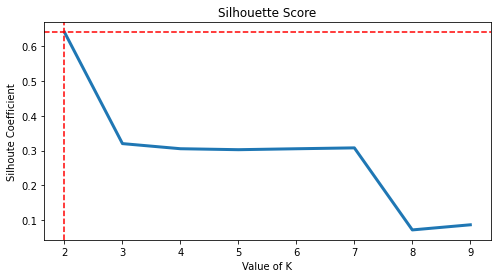

In [258]:
x = k_list
y = sil_list
fig= plt.figure(figsize=(8,4))
plt.plot(x, y, linewidth=3)
plt.xlabel('Value of K')
plt.ylabel('Silhoute Coefficient')
#plt.legend("Value of K againts silhouette coefficient",prop={'size': 16})
plt.axvline(x=2, color='red', linestyle='--')
plt.axhline(y=0.6405148142049537, color='red', linestyle='--')
plt.title("Silhouette Score")
plt.show()

In [229]:
kclusters = 2

ams_grouped_clustering = ams_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(ams_grouped_clustering)

# check cluster labels generated for each row in the data frame
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int32)

In [230]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Label', kmeans.labels_.astype(int))
# Neighbourhoods_venues_sorted['Cluster Label']=kmeans.labels_.astype(int)
ams_merged = nhoods

In [231]:
# merge ams_grouped with nhoods to add latitude/longitude for each Neighbourhood
ams_merged = ams_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighbourhood')
ams_merged.dropna(inplace=True)
ams_merged['Cluster Label'] = ams_merged['Cluster Label'].astype(int)
ams_merged.head()

,Neighbourhood,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
43,Bos en Lommer,52.378521,4.848738,0,Park,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Restaurant,Playground,Supermarket,Tram Station,Turkish Restaurant,Gym,Drugstore
12,Buiksloot,52.392562,4.929279,0,Bus Stop,Park,Ice Cream Shop,Tennis Court,Seafood Restaurant,Rest Area,Campground,Pharmacy,Farmers Market,Farm
13,Buikslotermeer,52.399439,4.943135,0,Sandwich Place,Supermarket,Convenience Store,Drugstore,Clothing Store,Shoe Store,Lingerie Store,Restaurant,Electronics Store,Seafood Restaurant
49,Buitenveldert,52.328647,4.873523,0,Hotel,Drugstore,Japanese Restaurant,Sushi Restaurant,Supermarket,Clothing Store,Coffee Shop,Grocery Store,Sandwich Place,Restaurant
42,De Baarsjes,52.368926,4.856382,0,Bar,Café,Restaurant,Tram Station,Coffee Shop,Supermarket,Ice Cream Shop,Falafel Restaurant,Middle Eastern Restaurant,Fish Market


In [232]:
import matplotlib.colors as colors
from matplotlib.colors import rgb2hex
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
rainbow[1]='#006000'
rainbow[0]='#006ff6'
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(ams_merged['Latitude'], ams_merged['Longitude'], ams_merged['Neighbourhood'], ams_merged['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-2],
        fill=True,
        fill_color=rainbow[cluster-2],
        fill_opacity=0.7).add_to(map_clusters)
legend_html =   '''
                <div style="position: fixed; 
                            top: 100px; right: 30px; width: 140px; height: 50px; 
                            border:2px solid blue; z-index:9999; font-size:15px;
                            ">&nbsp; Blue - Cluster 0 <br>
                              &nbsp; Green - Cluster 1 <br>
                              
                </div>
                ''' 

map_clusters.get_root().html.add_child(folium.Element(legend_html))
map_clusters

In [246]:
#ams_merged.head()
ams_cluster_0 = ams_merged[ams_merged['Cluster Label'] == 0]
ams_cluster_0

,Neighbourhood,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
43,Bos en Lommer,52.378521,4.848738,0,Park,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Restaurant,Playground,Supermarket,Tram Station,Turkish Restaurant,Gym,Drugstore
12,Buiksloot,52.392562,4.929279,0,Bus Stop,Park,Ice Cream Shop,Tennis Court,Seafood Restaurant,Rest Area,Campground,Pharmacy,Farmers Market,Farm
13,Buikslotermeer,52.399439,4.943135,0,Sandwich Place,Supermarket,Convenience Store,Drugstore,Clothing Store,Shoe Store,Lingerie Store,Restaurant,Electronics Store,Seafood Restaurant
49,Buitenveldert,52.328647,4.873523,0,Hotel,Drugstore,Japanese Restaurant,Sushi Restaurant,Supermarket,Clothing Store,Coffee Shop,Grocery Store,Sandwich Place,Restaurant
42,De Baarsjes,52.368926,4.856382,0,Bar,Café,Restaurant,Tram Station,Coffee Shop,Supermarket,Ice Cream Shop,Falafel Restaurant,Middle Eastern Restaurant,Fish Market
51,De Pijp,52.354240,4.896946,0,Italian Restaurant,Bar,Café,Pizza Place,Restaurant,Sandwich Place,Coffee Shop,Food Truck,Wine Bar,South American Restaurant
32,Eastern Docklands,52.374662,4.944210,0,Plaza,Harbor / Marina,Bookstore,Fish Market,Bus Stop,Restaurant,Liquor Store,Dutch Restaurant,Chinese Restaurant,Café
14,Floradorp,52.398532,4.914832,0,Furniture / Home Store,Park,Pool,Gym Pool,Snack Place,Pizza Place,Sporting Goods Shop,Bus Stop,Café,Bakery
60,Gaasperdam,52.306217,4.971680,0,Nightclub,Park,Playground,Harbor / Marina,Farm,Zoo,Event Service,Event Space,Exhibit,Falafel Restaurant
0,Grachtengordel,52.370837,4.885478,0,Bar,Hotel,Coffee Shop,Clothing Store,Bookstore,Restaurant,Italian Restaurant,French Restaurant,Chocolate Shop,Café


In [247]:
cluster_0_lat_lon = ams_cluster_0[['Latitude', 'Longitude']]
cluster_0_lat_lon.head()

,Latitude,Longitude
43,52.378521,4.848738
12,52.392562,4.929279
13,52.399439,4.943135
49,52.328647,4.873523
42,52.368926,4.856382


In [248]:
ams_cluster_0.drop(['Neighbourhood', 'Latitude', 'Longitude', 'Cluster Label'], axis=1, inplace=True)

/usr/lib64/python3.8/site-packages/pandas/core/frame.py:4110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [249]:
ams_cluster_0.head()

,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
43,Park,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Restaurant,Playground,Supermarket,Tram Station,Turkish Restaurant,Gym,Drugstore
12,Bus Stop,Park,Ice Cream Shop,Tennis Court,Seafood Restaurant,Rest Area,Campground,Pharmacy,Farmers Market,Farm
13,Sandwich Place,Supermarket,Convenience Store,Drugstore,Clothing Store,Shoe Store,Lingerie Store,Restaurant,Electronics Store,Seafood Restaurant
49,Hotel,Drugstore,Japanese Restaurant,Sushi Restaurant,Supermarket,Clothing Store,Coffee Shop,Grocery Store,Sandwich Place,Restaurant
42,Bar,Café,Restaurant,Tram Station,Coffee Shop,Supermarket,Ice Cream Shop,Falafel Restaurant,Middle Eastern Restaurant,Fish Market


In [250]:
restaurants_in_cluster_1 = pd.Series(ams_cluster_0.values.flatten())

In [251]:
rest_list = []
for i in restaurants_in_cluster_0:
    if 'Restaurant' in (i):        
        rest_list.append(i)

In [252]:
freq = {x:rest_list.count(x) for x in rest_list}
print(freq)

{'Vegetarian / Vegan Restaurant': 5, 'Fast Food Restaurant': 6, 'Restaurant': 32, 'Turkish Restaurant': 6, 'Seafood Restaurant': 4, 'Dutch Restaurant': 2, 'Japanese Restaurant': 4, 'Italian Restaurant': 23, 'South American Restaurant': 3, 'Chinese Restaurant': 3, 'Eastern European Restaurant': 2, 'Empanada Restaurant': 5, 'Ethiopian Restaurant': 6, 'French Restaurant': 6, 'Ramen Restaurant': 1, 'Tapas Restaurant': 5, 'Modern European Restaurant': 3, 'Middle Eastern Restaurant': 2, 'Asian Restaurant': 4, 'Thai Restaurant': 1, 'Indonesian Restaurant': 3, 'Mediterranean Restaurant': 2, 'Sushi Restaurant': 2, 'Falafel Restaurant': 3, 'Cantonese Restaurant': 1, 'Indian Chinese Restaurant': 1, 'Moroccan Restaurant': 1, 'Caribbean Restaurant': 1, 'Greek Restaurant': 1}


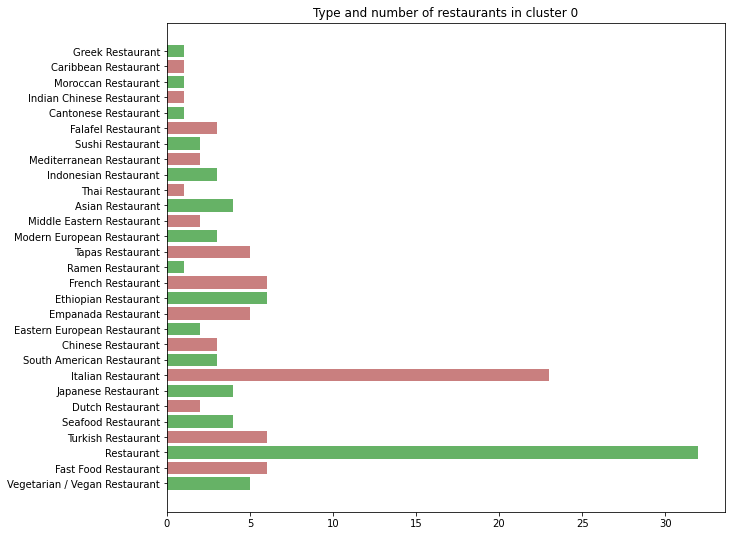

In [259]:
plt.figure(figsize=(10,9))
plt.barh(range(len(freq)), list(freq.values()),  align='center', color= ['green', 'brown'], alpha=0.6)
plt.yticks(range(len(freq)), list(freq.keys()))
plt.title('Type and number of restaurants in cluster 0')
plt.show()

In [254]:
url_list = []
LIMIT = 30
radius = 300
categoryId='5293a7563cf9994f4e043a44' ### The categoryId for a Russian restaurant.
VERSION = 20200605

for i in range(0, len(cluster_0_lat_lon)-1):
    try:
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET,  
        VERSION,      
        cluster_0_lat_lon.Latitude[i], 
        cluster_0_lat_lon.Longitude[i],       
        radius,    
        LIMIT,    
        categoryId,
        )
    except:
        continue
    url_list.append(url)


In [255]:
for url in url_list:
    results = requests.get(url).json()
    totalResults = results['response']['totalResults']
    for n in range(0, totalResults):
        venues = results['response']['groups'][0]['items'][n]['venue']['name']
        category = results['response']['groups'][0]['items'][n]['venue']['categories'][0]['name']
        print("Name: {}, Category: {}".format(venues, category))

Name: Haesje Claes, Category: Dutch Restaurant
Name: G's, Category: Comfort Food Restaurant
Name: Sunny Yummy, Category: Ukrainian Restaurant
Name: Café De Tuin, Category: Bar
Name: Café Brecht, Category: Bar


As we can see in the results here is that even with the Foursquare categoryId for Russian restaurants it did not return
any in my cluster.
So maybe the algorithm needs to be changed or there simply is no demand for a Russian restaurant in Amsterdam

I could not get exact info on the prices for commercial property I needed some more time but based on the prices per square meter it
seems like Amsterdam will be a very expensive city to start a restaurtant.

<img src="property_prices_per_m2.png"/>


source: https://www.numbeo.com/cost-of-living/in/Amsterdam

<h3>Conclusion:</h3>
    
Since I did not find any Russian restaurants in Amsterdam we might ask ourselves whether there is no ambiance for it and we might have to 
look for an alternative restaurant or maybe the prices of properties are too high to be able to sustain a Russian restaurant in Amsterdam.
Unfortunately I did not find enough data regarding the property prices, only a rough estimate of costs in the city of Amsterdam
to base my calculations on.
I wasa also hoping to find more info on Russian people living and visiting Amsterdam but in the two weeks time given for this project
I did not find the resources.